In [1]:
import io
import random
import string
import warnings
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')


import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *


In [2]:
# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


In [3]:
# python imports
import re
import json
import os
from collections import Counter
import datetime as dt

In [4]:
# Visualization
from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from tqdm import tqdm_notebook

In [5]:
# Saving models
import pickle

In [17]:
df = pd.read_csv(r"C:\Users\hp\Desktop\checknewdata.csv", encoding='latin1')

In [19]:
df.tail()

,Tweet Id,Text,Name,Screen Name,UTC,Created_At,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs,Unnamed: 16,Unnamed: 17,Unnamed: 18
2049,1277529254444494848,RT @ICMRDELHI : COVID-19 Testing Update . For ...,_R..E..D.D..Y_,PurnaReddy_07_,2020-06-29T09:08:04.000Z,Mon Jun 29 09:08:04 +0000 2020,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,https://www.icmr.gov.in,4,0,photo,https://pbs.twimg.com/media/EbpiKOOVcAU2yll.jpg,NaN,NaN,NaN
2050,1277529233640656899,42 new cases puts total count at 690 in #Puduc...,PondyLive Puducherry Updates,pondy_live,2020-06-29T09:07:59.000Z,Mon Jun 29 09:07:59 +0000 2020,0,1,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,NaN,2,0,NaN,NaN,NaN,NaN,NaN
2051,1277528964567724033,RT @UrsVamsiShekar : #AndhraPradesh #CoronaUpd...,sampath,sampath533,2020-06-29T09:06:55.000Z,Mon Jun 29 09:06:55 +0000 2020,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,6,0,photo,https://pbs.twimg.com/media/EbqvQ_NVAAExVtd.jpg,NaN,NaN,NaN
2052,1277528316728078337,?????? ?????-??? ??? ?????? ??????? ?? ???? ??...,????? ??????,betulnews,2020-06-29T09:04:20.000Z,Mon Jun 29 09:04:20 +0000 2020,2,0,hi,"<a href=""http://twitter.com/download/android"" ...",Tweet,https://betulmedia.com/corona-positive-case/,1,0,NaN,NaN,NaN,NaN,NaN
2053,1277526954447523841,https://t.co/TARkjAx8jR\nCorona medicine 'reme...,Mo Odisha,MoOdishaNews,2020-06-29T08:58:55.000Z,Mon Jun 29 08:58:55 +0000 2020,2,0,ca,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,https://www.moodisha.com/2020/06/29/corona-vac...,3,0,photo,https://pbs.twimg.com/media/Ebqv9itU0AcRf3m.png,NaN,NaN,NaN


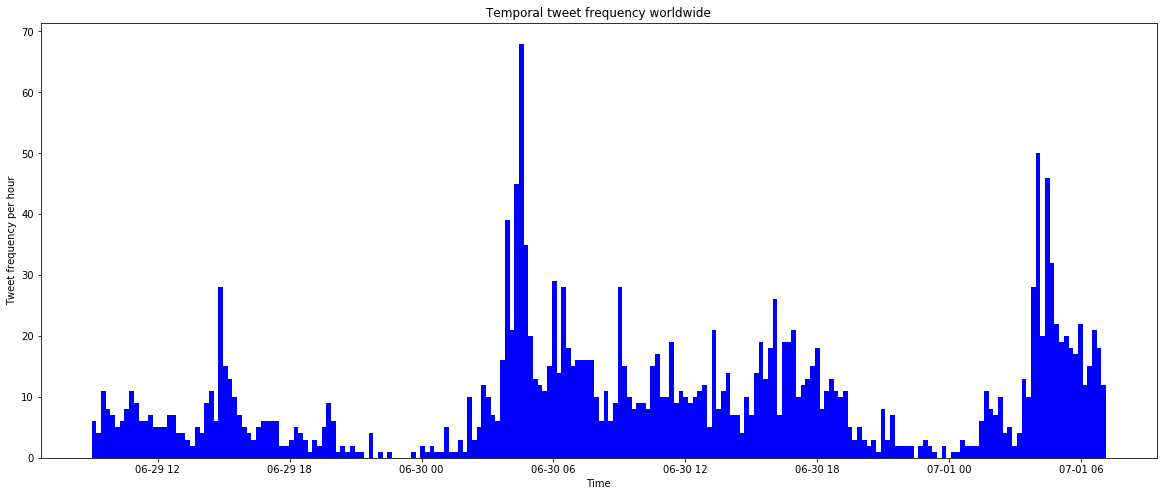

In [20]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.set(title='Temporal tweet frequency worldwide', xlabel='Time', ylabel='Tweet frequency per hour')
plt.hist(pd.to_datetime(df.Created_At), bins = 24*9, color = 'b')
plt.show()

In [22]:
text_en = df['Text']

In [23]:
text_en_lr = text_en.apply(lambda x: re.sub(r"https\S+", "", str(x)))
text_en_lr.head()

0    This is how #navmanjari army preparing for the...
1    #?????? ????????? ?? ?????? ?????? ????? ? ???...
2    RT @spbhattacharya : #CoronaUpdatesInIndia \n...
3    RT @SuVe4Madurai : ????????????? ??? ?????????...
4    RT @spbhattacharya : #CoronaUpdatesInIndia \n...
Name: Text, dtype: object

In [24]:
text_en_lr_lc = text_en_lr.apply(lambda x: x.lower())
text_en_lr_lc.head()

0    this is how #navmanjari army preparing for the...
1    #?????? ????????? ?? ?????? ?????? ????? ? ???...
2    rt @spbhattacharya : #coronaupdatesinindia \n...
3    rt @suve4madurai : ????????????? ??? ?????????...
4    rt @spbhattacharya : #coronaupdatesinindia \n...
Name: Text, dtype: object

In [25]:
text_en_lr_lc_pr = text_en_lr_lc.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
text_en_lr_lc_pr.head()

0    this is how navmanjari army preparing for the ...
1                     \nair report  anandgkalyankar...
2    rt spbhattacharya  coronaupdatesinindia \n  c...
3    rt suve4madurai    \ndoctorsday\ndoctorsday202...
4    rt spbhattacharya  coronaupdatesinindia \n  c...
Name: Text, dtype: object

In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
stop_words = set(stopwords.words('english'))
stop_words.update(['#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 'amp', 'coronavirus', 'covid19'])

text_en_lr_lc_pr_sr = text_en_lr_lc_pr.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
text_en_lr_lc_pr_sr.head()

0    navmanjari army preparing dry ration kit distr...
1      air report anandgkalyankar coronaupdatesinindia
2    rt spbhattacharya coronaupdatesinindia  coron...
3    rt suve4madurai doctorsday doctorsday2020 madu...
4    rt spbhattacharya coronaupdatesinindia  coron...
Name: Text, dtype: object

In [28]:
word_list = [word for line in text_en_lr_lc_pr_sr for word in line.split()]
word_list[:5]

['navmanjari', 'army', 'preparing', 'dry', 'ration']

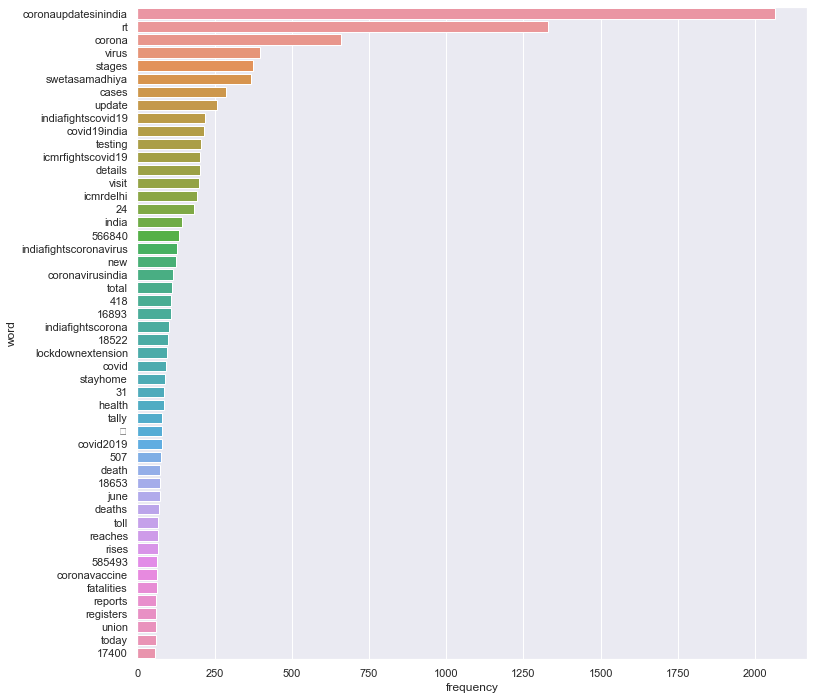

In [29]:
sns.set(style="darkgrid")
counts = Counter(word_list).most_common(50)
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['word', 'frequency']

fig, ax = plt.subplots(figsize = (12, 12))
ax = sns.barplot(y="word", x='frequency', ax = ax, data=counts_df)
plt.savefig('wordcount_bar.png')

In [30]:
from wordcloud import WordCloud

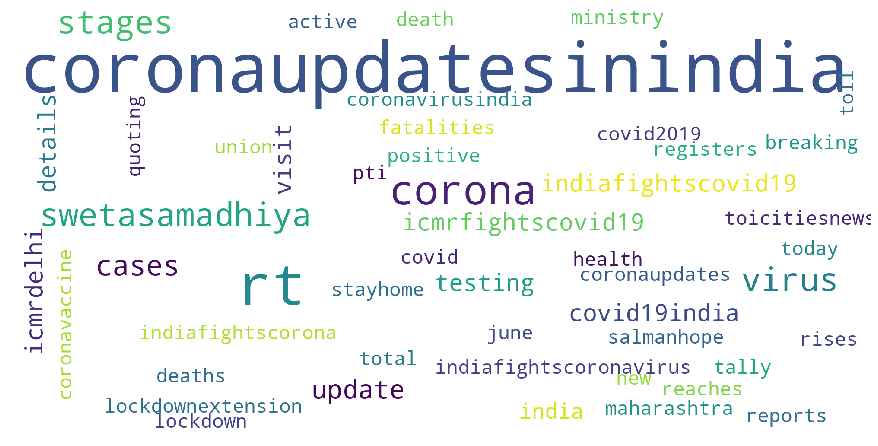

In [49]:
wordcloud = WordCloud(
    background_color='white',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(word_list))


plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('wordcloud.png')

In [45]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [33]:
sid = SentimentIntensityAnalyzer()
sentiment_scores = text_en_lr_lc_pr_sr.apply(lambda x: sid.polarity_scores(x))
sent_scores_df = pd.DataFrame(list(sentiment_scores))
sent_scores_df.tail()

,neg,neu,pos,compound
2049,0.0,1.00,0.00,0.0000
2050,0.0,0.84,0.16,0.7096
2051,0.0,1.00,0.00,0.0000
2052,0.0,1.00,0.00,0.0000
2053,0.0,1.00,0.00,0.0000


In [34]:
sent_scores_df['val'] = sent_scores_df['compound'].apply(lambda x: 'neutral' if x == 0 else ('positive' if x > 0 else 'negative'))
sent_scores_df.head()

,neg,neu,pos,compound,val
0,0.0,0.747,0.253,0.6249,positive
1,0.0,1.000,0.000,0.0000,neutral
2,0.0,1.000,0.000,0.0000,neutral
3,0.0,1.000,0.000,0.0000,neutral
4,0.0,1.000,0.000,0.0000,neutral


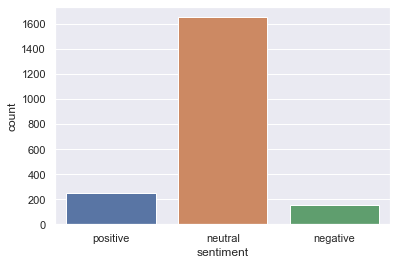

In [39]:
sent_counts = pd.DataFrame.from_dict(Counter(sent_scores_df['val']), orient = 'index').reset_index()
sent_counts.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_counts)
plt.savefig('sentiment.png')

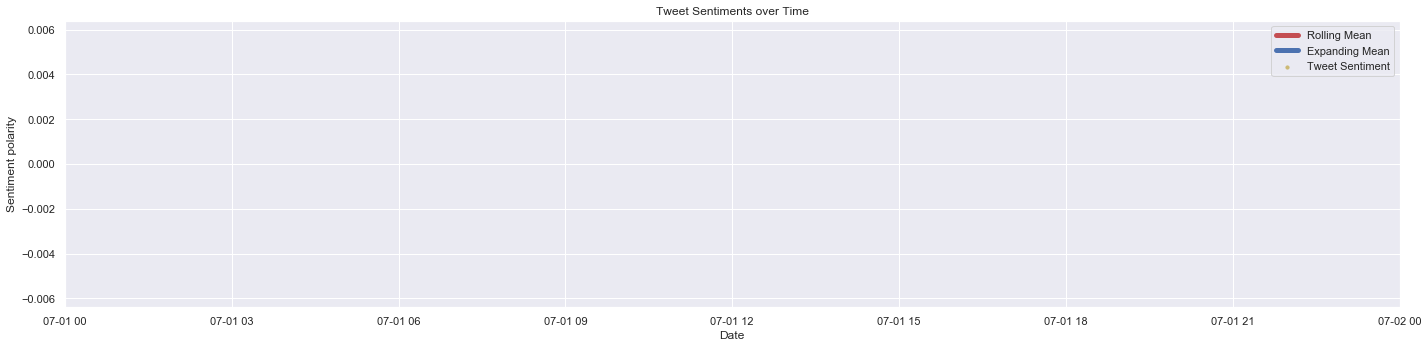

In [72]:
sentiments_time_df = pd.DataFrame()
sentiments_time_df['time'] = df['Created_At']
sentiments_time_df['polarity'] = sent_scores_df['compound']
sentiments_time_df.index = pd.to_datetime(sentiments_time_df['time'])


ot = sentiments_time_df.sample(frac=.001)
ot['time'] = pd.to_datetime(ot['time'])
ot.index = pd.to_datetime(ot['time'])
ot.sort_index(inplace=True)
ot['expanding'] = ot['polarity'].expanding().mean()
ot['rolling'] = ot['polarity'].rolling('1h').mean()


fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)

ax.scatter(ot['time'],ot['polarity'], label='Tweet Sentiment', s = 10, color = 'y')
ax.plot(ot['time'],ot['rolling'], color ='r', label='Rolling Mean', linewidth = 5)
ax.plot(ot['time'],ot['expanding'], color='b', label='Expanding Mean', linewidth = 5)
ax.set_xlim([dt.date(2020,7,1),dt.date(2020,7,2)])
ax.set(title='Tweet Sentiments over Time', xlabel='Date', ylabel='Sentiment polarity')
ax.legend(loc='best')
fig.tight_layout()
plt.savefig('temporal_sentiments.png')


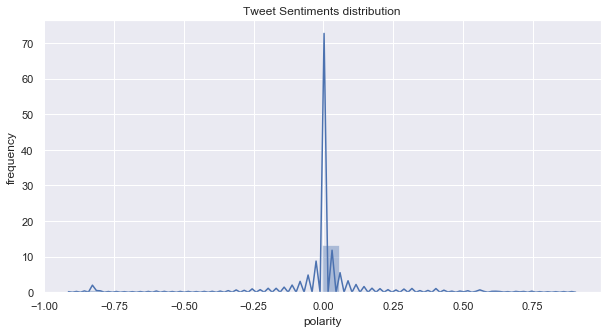

In [64]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set(title='Tweet Sentiments distribution', xlabel='polarity', ylabel='frequency')
sns.distplot(sentiments_time_df['polarity'], bins=30, ax=ax)
# plt.show()
plt.savefig('sentiment_distribution.png')

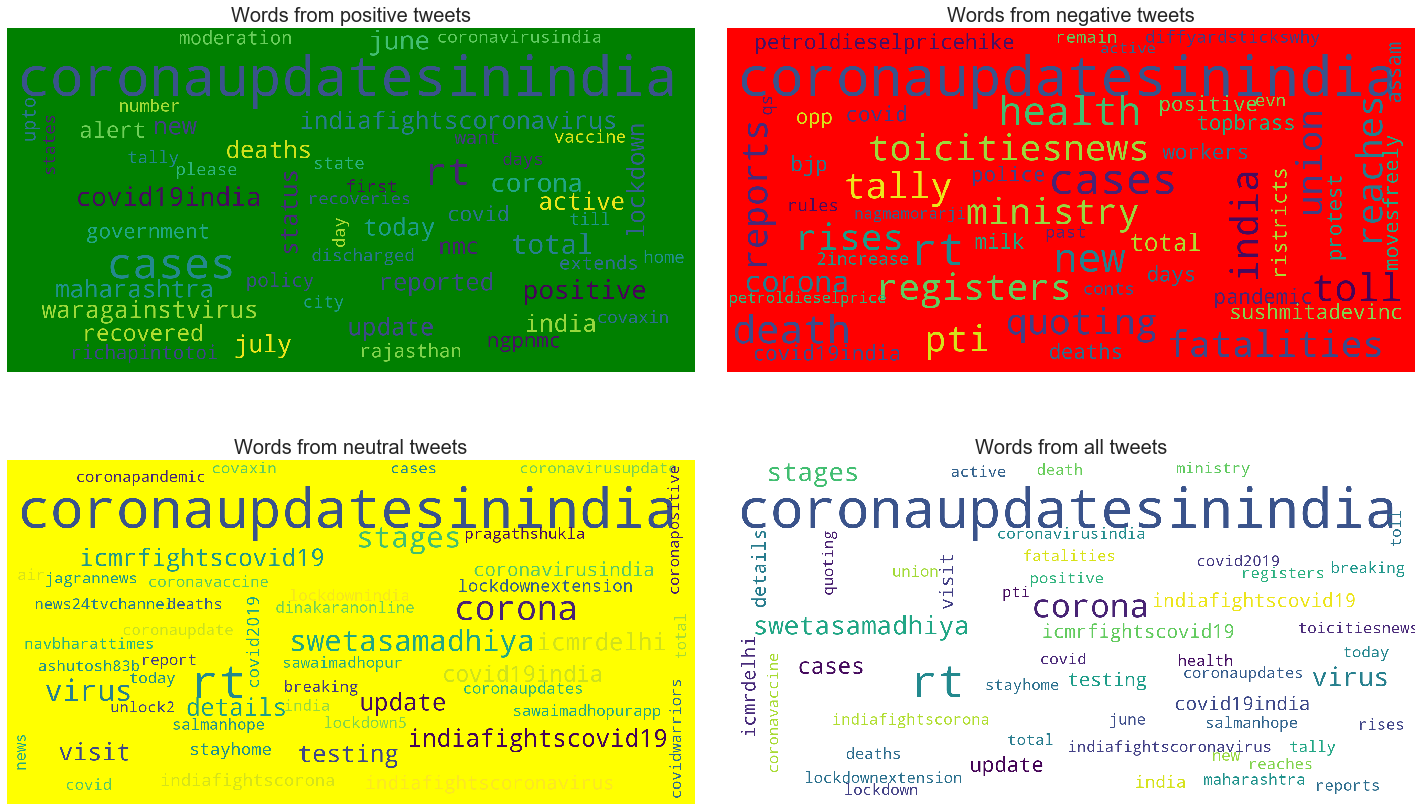

In [66]:
polar_tweets_df = pd.DataFrame()
polar_tweets_df['tweet'] = text_en_lr_lc_pr_sr
polar_tweets_df['polarity'] = sent_scores_df['val']

positive = polar_tweets_df[polar_tweets_df['polarity'] == 'positive']['tweet']
negative = polar_tweets_df[polar_tweets_df['polarity'] == 'negative']['tweet']
neutral = polar_tweets_df[polar_tweets_df['polarity'] == 'neutral']['tweet']

positive_list = [word for line in positive for word in line.split()]
negative_list = [word for line in negative for word in line.split()]
neutral_list = [word for line in neutral for word in line.split()]

positive_cloud = WordCloud(
    background_color='green',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(positive_list))

negative_cloud = WordCloud(
    background_color='red',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(negative_list))

neutral_cloud = WordCloud(
    background_color='yellow',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(neutral_list))

fig, axs = plt.subplots(2, 2, figsize = (20, 12))
# fig.suptitle('Clouds of polar words', fontsize = 30)
fig.tight_layout(pad = 0)

axs[0, 0].imshow(positive_cloud)
axs[0, 0].set_title('Words from positive tweets', fontsize = 20)
axs[0, 0].axis('off')
# axs[0, 0].tight_layout(pad = 1)

axs[0, 1].imshow(negative_cloud)
axs[0, 1].set_title('Words from negative tweets', fontsize = 20)
axs[0, 1].axis('off')
# axs[0, 1].tight_layout(pad = 1)

axs[1, 0].imshow(neutral_cloud)
axs[1, 0].set_title('Words from neutral tweets', fontsize = 20)
axs[1, 0].axis('off')
# axs[1, 0].tight_layout(pad = 1)

axs[1, 1].imshow(wordcloud)
axs[1, 1].set_title('Words from all tweets', fontsize = 20)
axs[1, 1].axis('off')
# axs[1, 0].tight_layout(pad = 1)
plt.savefig('joint_cloud.png')

In [43]:
positive

0       navmanjari army preparing dry ration kit distr...
18      rt aniketd03869906 coronaupdatesinindia 1st ju...
26      rt ryanchadha bangalore folks indiranagar vigi...
46      deputy mayor karimnagar two sons test positive...
50      bangalore folks indiranagar vigilant robberies...
                              ...                        
2035    rt pondylive 42 new cases puts total count 690...
2040    hyderabad congress seeks telangana shrc direct...
2042    last week prime time debates aajtak republic n...
2046    one best decisions long time problem implement...
2050    42 new cases puts total count 690 puducherry t...
Name: tweet, Length: 248, dtype: object

In [68]:
negative

13      102 report negative shahkot coronavirusoutbrea...
14      rt keypadguerilla farmers magadi taluk karnata...
34      six patients died jammu kashmir tuesday taking...
49      rt keypadguerilla farmers magadi taluk karnata...
69      rt keypadguerilla farmers magadi taluk karnata...
                              ...                        
1916    coronaupdatesinindia many cooperative societie...
1972    shame they discontinued oxygen hyderabad mans...
2001    29 282 86 biharfightscorona biharupdatecovid19...
2036    rt wpimaharashtra coronaupdatesinindia media t...
2037    rt hpstvindia record singleday jump 19906 case...
Name: tweet, Length: 152, dtype: object

In [69]:
neutral

1         air report anandgkalyankar coronaupdatesinindia
2       rt spbhattacharya coronaupdatesinindia  coron...
3       rt suve4madurai doctorsday doctorsday2020 madu...
4       rt spbhattacharya coronaupdatesinindia  coron...
5       saynotorapist saynotoracism saynotosuicide cov...
                              ...                        
2048    rt machuveraman army dongri mumbai mumbaipolic...
2049    rt icmrdelhi testing update details visit icmr...
2051    rt ursvamsishekar andhrapradesh coronaupdatesi...
2052                                 coronaupdatesinindia
2053    corona medicine remediesvir arrives odisha cor...
Name: tweet, Length: 1654, dtype: object